### Algorithm searching for Nash equilibrium using best responses

In [1]:
# Cite:
# https://github.com/PharmCat/MvNormalCDF.jl

# Total cost:
# c_0_a^3 + m * c_res_a # Main results here
# c_0_a^4 + m * c_res_a

Keep the parameters as 2 as before.

In [1]:
# import packages
using Distributions, Random, MvNormalCDF
using Query, Plots, StatsPlots
using DataFrames, CSV, Dates

[ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
[ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]


Define the functions

In [2]:
# Example functions of deltap: from the investment to the value brought by the developers
## Linear

# function deltap_a(c_0_a) # original: 2
#     2 * c_0_a
# end

# function deltap_b(c_0_b)
#     2 * c_0_b
# end

## Quadratic

function deltap_a(c_0_a) # original: 2
    2 * c_0_a
end

function deltap_b(c_0_b)
    2 * c_0_b
end

deltap_b (generic function with 1 method)

In [3]:
# Example functionality of softwares

function theta_func(theta_1_bar_a, c_0_a)
    theta_1_bar_a + 2 * c_0_a
end    

theta_func (generic function with 1 method)

In [4]:
# Example utility function of customer

function util(u_bar_a, x_1, y_1, theta_1, c_0_a, p_s_a)
    u_bar_a + x_1 * theta_1 + y_1 * c_0_a - p_s_a
end

util (generic function with 1 method)

In [5]:
# Example total cost

function c_total_a(c_0_a, m, c_res_a)
    c_0_a^3 + m * c_res_a
end

# function c_total_a(c_0_a, m, c_res_a)
#     c_0_a^4 + m * c_res_a
# end

c_total_a (generic function with 1 method)

In [6]:
# Example functions of profits of owners (firms a and b)

function profit_a(m, price_s_a, c_0_a, c_res_a)
    m * price_s_a - c_0_a^3 - m * c_res_a
end

# function profit_a(m, price_s_a, c_0_a, c_res_a)
#     m * price_s_a - c_0_a^4 - m * c_res_a
# end

profit_a (generic function with 1 method)

Joint distribution of customers

In [7]:
# By now we assume that both follow normal distributions
# x ~ N(0.8, 0.05) # tbd: evidence?
# y ~ N(0, 0.05)
# Joint dist.: correlation = 0 # tbd: evidence?
# Draw the bivariate joint dist.
mu = [0.8; 0];
sigma = [0.05^2 0; 0 0.2^2];
dist01 = MvNormal(mu, sigma);

┌ Warning: `dim(a::AbstractMatrix)` is deprecated, use `LinearAlgebra.checksquare(a)` instead.
│   caller = MvNormal at mvnormal.jl:186 [inlined]
└ @ Core ~/.julia/packages/Distributions/9Albf/src/multivariate/mvnormal.jl:186


In [8]:
# Bivariate Normal dist.
a = [0; -1]
b = [1; 1]
# m: number of integration points (default 1000*dimension)
(p,e) = mvnormcdf(mu, sigma, a, b; m = 2000) # Multivariate Normal probability integral

(0.9999677554731808, 0.0)

In [9]:
# Sampling
Random.seed!(123);
rand_sample01 = rand(dist01,100)'; # '100 Consumers
# rand_sample01 = rand(dist01,1000)'; # 1000; 100;

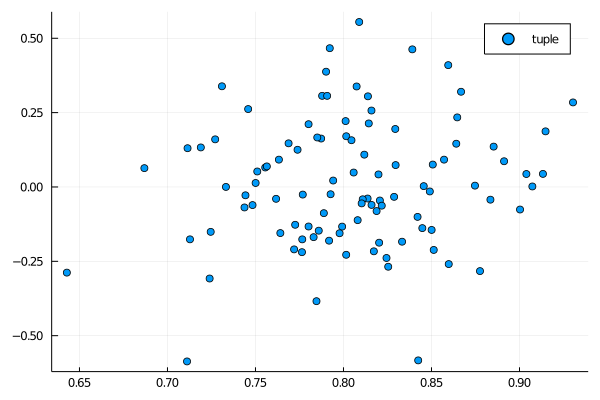

In [10]:
x = rand_sample01[:,1]
y = rand_sample01[:,2]
plot(x, y, seriestype=:scatter, label="tuple")

In [11]:
# Check range: should be restricted to the range [0,1] and [-1,1]
[minimum(x), maximum(x), minimum(y), maximum(y)]

4-element Array{Float64,1}:
  0.6428367908084658
  0.9303970344001146
 -0.5866119017451293
  0.5547190090544057

In [12]:
# Save the sample values
rand_sample01

100×2 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.859513   0.409636
 0.857133   0.0918831
 0.780166  -0.132943
 0.849048  -0.0150966
 0.813691  -0.0388458
 0.783032  -0.168776
 0.755553   0.065443
 0.82962    0.0736004
 0.785943  -0.146977
 0.764129  -0.155014
 0.751023   0.0520805
 0.776576  -0.176179
 0.813886   0.304783
 ⋮         
 0.74431   -0.0280298
 0.891237   0.0864611
 0.745842   0.261945
 0.776866  -0.0255901
 0.768807   0.146716
 0.77641   -0.219216
 0.845587   0.00277579
 0.914795   0.186996
 0.900303  -0.0758582
 0.810323  -0.0552055
 0.859793  -0.259301
 0.828764  -0.0332002

In [13]:
df_rand_sample01 = DataFrame(s = x, st_R = y)

,s,st_R
,Float64,Float64
1,0.859513,0.409636
2,0.857133,0.0918831
3,0.780166,-0.132943
4,0.849048,-0.0150966
5,0.813691,-0.0388458
6,0.783032,-0.168776
7,0.755553,0.065443
8,0.82962,0.0736004
9,0.785943,-0.146977


In [14]:
# CSV.write("C:\\Users\\zwang3\\Downloads\\rand_sample01_n_1000.csv", df_rand_sample01)
# CSV.write("rand_sample01_n_100.csv", df_rand_sample01)

Check the scenarios

In [15]:
# position01 = r"C:\Users\think\sciebo\Bounded Rationality\Digitalization_SC\Data Value Chain\Cross-border Data Flows\Selected Distributions and Sampling"

In [16]:
# rand_sample02_new_100 = CSV.read("C:\\Users\\think\\sciebo\\Bounded Rationality\\Digitalization_SC\\Data Value Chain\\Cross-border Data Flows\\Selected Distributions and Sampling\\rand_sample02_new_100.csv", DataFrame) # distribution 2
# rand_sample02_new_100 = CSV.read("C:\\Users\\think\\sciebo\\Bounded Rationality\\Digitalization_SC\\Data Value Chain\\Cross-border Data Flows\\Selected Distributions and Sampling\\rand_sample03_new_100.csv", DataFrame) # distribution 3
rand_sample02_new_100 = df_rand_sample01

,s,st_R
,Float64,Float64
1,0.859513,0.409636
2,0.857133,0.0918831
3,0.780166,-0.132943
4,0.849048,-0.0150966
5,0.813691,-0.0388458
6,0.783032,-0.168776
7,0.755553,0.065443
8,0.82962,0.0736004
9,0.785943,-0.146977


In [17]:
# CSV.read("C:\\Users\\zwang3\\Downloads\\rand_sample01_n_1000.csv", DataFrame) #; delim=","
# rand_sample02_new_100 = CSV.read("C:\\Users\\think\\Downloads\\rand_sample02_new_100.csv", DataFrame) # distribution 2
# rand_sample02_new_100 = CSV.read("C:\\Users\\think\\sciebo\\Bounded Rationality\\Digitalization_SC\\Data Value Chain\\Cross-border Data Flows\\Selected Distributions and Sampling\\rand_sample03_new_100.csv", DataFrame) # distribution 3
x = rand_sample02_new_100.s
y = rand_sample02_new_100.st_R

# One certain setup

# policy factor: data restriction
c_res_a = 5; c_res_b = 5

# cost of contract
c_0_a = 60; c_0_b = 60

# fundamental 
theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8

# functionality
theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a)
theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b)

# utility constant
u_bar_a = 100; u_bar_b = 100;

# number of customers
n_customers = 100;

# check Consumers' tastes
s = x; 
st_R = y;

# reserved utility
ru = 50; # homogenous

In [18]:
# One certain setup

# policy factor: data restriction
c_res_a = 5; c_res_b = 5

# cost of contract
c_0_a = 60; c_0_b = 60

# fundamental 
theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8

# functionality
theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a)
theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b)

# utility constant
u_bar_a = 100; u_bar_b = 100;

# number of customers
n_customers = 100;

In [19]:
# check Consumers' tastes
s = x; 
st_R = y;

# reserved utility
ru = 50; # homogenous

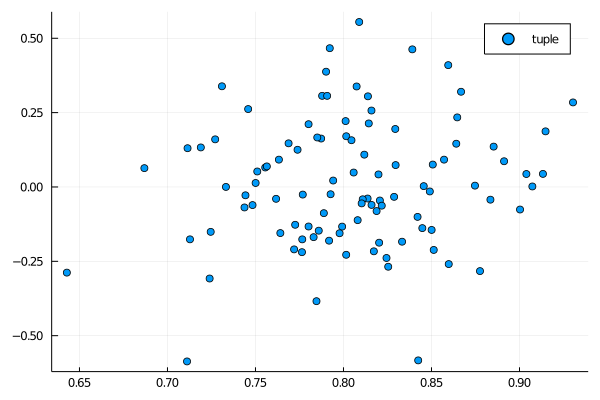

In [20]:
plot(x, y, seriestype=:scatter, label="tuple")

Visualization of the equilibrium point.

In [22]:
n_customers

100

In [25]:
c_res_a, c_res_b

(3, 3)

Here we assume that there is a maximum investment an Owner can choose. Now we search for the Nash equilibria.

In [26]:
### Julia Code: Earlier Version ###
# # Asymmetric Case

# price_a_set = []; price_b_set = [];
# c_0_a_set = []; c_0_b_set = [];

# # policy factor: data restriction
# # c_res_a = 5; c_res_b = 5;

# co_a_range = 10; # 10
# co_b_range = 10; # 10 

# # cost of contract # adjust this
# c_0_a = 0; 

# # there could be points which do not intersect, if so, draw the lines and estimate them

# step_size = 0.5 # 0.5, 2, 5, ...

# for co_a in 0:step_size:co_a_range # shorten the step: 0:0.5:co_a_range

#     c_0_a = co_a; 

#     for co_b in (c_0_a+step_size):step_size:co_b_range # shorten the step: (c_0_a+0.5):0.5:co_b_range
#     # for co_b in 0:0.5:co_b_range # shorten the step # For asymmetric data policies

#         c_0_b = co_b; # 0, 50, 100, 150, 200, 250, 300

#         # fundamental 
#         theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8

#         # functionality
#         theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a);
#         theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b);

#         Random.seed!(123);

#         pricelist1 = []
#         maxpricelist1 = [] # track the best response of b

#         search_range = 200;

#         for jj in 1:search_range # 100, 200

#             price_s_a = jj # Under certain price jj, check the best response of b
#             pricelist1 = []

#             for ii in 1:search_range

#                 price_s_b = ii

#                 # Trial: Utility
#                 utili_a = []
#                 utili_b = []
#                 for i in 1:n_customers
#                     append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
#                     append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
#                 end

#                 # buy randomly from one company if the utilities are the same
#                 dist_bin = Binomial(1, 0.5); # (n,p)
#                 bin = rand(dist_bin, n_customers)'; #'

#                 # count the numbers of purchase: buy - from a; buy2 - from b;
#                 buy = []; buy2 = [];

#                 for j in 1:n_customers
#                     if ru <= max(utili_a[j], utili_b[j])
#                         if utili_a[j] > utili_b[j]
#                             append!(buy, 1);
#                         elseif utili_a[j] < utili_b[j]
#                             append!(buy2, 1);
#                         else
#                             append!(buy, bin[j]);
#                             append!(buy2, 1-bin[j]);
#                         end
#                     else
#                     end
#                 end

#                 # Count the purchases
#                 append!(buy, 0) # get rid of Any([])
#                 append!(buy2, 0)

#                 m1 = sum(buy)
#                 m2 = sum(buy2)
#                 pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
#                 pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

#                 append!(pricelist1, pr2)

#             end

#             # Find which price could bring the maximum profit
#             indx = minimum(findall(x -> x == maximum(pricelist1), pricelist1))
#             append!(maxpricelist1, range(1, search_range)[indx]) # 100, 200

#         end

#         # Find the certain list

#         # maxpricelist1 # set of the BR of b under different prices of a
#         search_range2 = union(maxpricelist1) # the possible BR of b, duplicates in the list dropped

#         Random.seed!(123);

#         pricelist2 = []
#         maxpricelist2 = [] # track the best response of b

#         for jj in search_range2

#             price_s_b = jj # Under certain price jj, check the best response of b
#             pricelist2 = []

#             for ii in 1:search_range

#                 price_s_a = ii

#                 # Trial: Utility
#                 utili_a = []
#                 utili_b = []
#                 for i in 1:n_customers
#                     append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
#                     append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
#                 end

#                 # buy randomly from one company if the utilities are the same
#                 dist_bin = Binomial(1, 0.5); # (n,p)
#                 bin = rand(dist_bin, n_customers)'; #'

#                 # count the numbers of purchase: buy - from a; buy2 - from b;
#                 buy = []; buy2 = [];

#                 for j in 1:n_customers
#                     if ru <= max(utili_a[j], utili_b[j])
#                         if utili_a[j] > utili_b[j]
#                             append!(buy, 1);
#                         elseif utili_a[j] < utili_b[j]
#                             append!(buy2, 1);
#                         else
#                             append!(buy, bin[j]);
#                             append!(buy2, 1-bin[j]);
#                         end
#                     else
#                     end
#                 end

#                 # Count the purchases
#                 append!(buy, 0) # get rid of Any([])
#                 append!(buy2, 0)

#                 m1 = sum(buy)
#                 m2 = sum(buy2)
#                 pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
#                 pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

#                 append!(pricelist2, pr1)

#             end

#             # Find which price could bring the maximum profit
#             indx = minimum(findall(x -> x == maximum(pricelist2), pricelist2))
#             append!(maxpricelist2, range(1, search_range)[indx])

#         end

#         # Find the possible solutions 
#         # maxpricelist2 # set of the BR of a under different prices of b

#         tuple_b = tuple.(range(1, search_range, step = 1), maxpricelist1);
#         tuple_a = tuple.(maxpricelist2, search_range2);

#         # Find the same element of the vector: get the equilibrium prices (p_a*, p_b*)
#         set00 = intersect(Set(tuple_a), Set(tuple_b));

#         # Check the results under the equilibrium
#         # for just in range(1,100):
#         price_s_a = getfield.(set00, 1)[1]; price_s_b = getfield.(set00, 2)[1]; # derived from last step
#         price_a_set = append!(price_a_set, price_s_a);
#         price_b_set = append!(price_b_set, price_s_b);
#         c_0_a_set = append!(c_0_a_set, c_0_a);
#         c_0_b_set = append!(c_0_b_set, c_0_b);
        
#     end
    
# end

# Same search range
# search_range = 200; search_range2 = 200

# Draw the range
# x_start = 10
# y_start = 10
# plot(x_start + 1 : x_start + 10, 
#     y_start + 1 : y_start + 10, 
#     label = "45° line", ls=:dash) # , aspect_ratio = 1
# xlabel!("Price range of Owner a (Price response of Owner b)")
# ylabel!("Price response of Owner b (Price range of Owner a)")
# plot!(xlabelfontsize=8, ylabelfontsize=8)
# plot!(range(1, search_range, step = 1), maxpricelist1, label = "Best response of Owner b", lw=1)
# plot!(maxpricelist2, search_range2, label = "Best response of Owner a", lw=1)


# xlims!(x_start + 0, x_start + 10)
# ylims!(y_start + 0, y_start + 10)
# xticks!(x_start + 0:1:x_start + 10)
# yticks!(y_start + 0:1:y_start + 10)

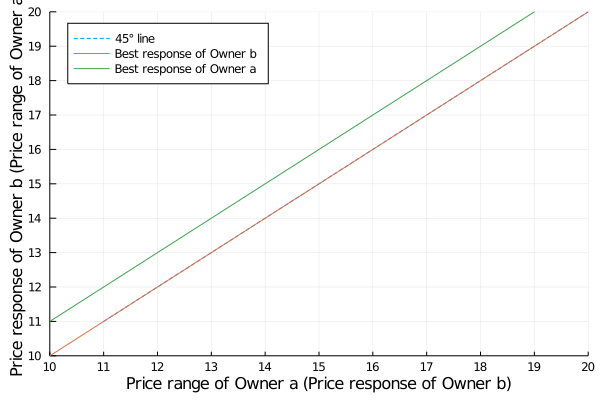

In [35]:
### Julia Code: v1.4.2 ###
# Asymmetric Case

# Initialize global variables for results
global price_a_set = Float64[]
global price_b_set = Float64[]
global c_0_a_set = Float64[]
global c_0_b_set = Float64[]

# Initialize global variables for plotting
global final_maxpricelist1 = Float64[]
global final_maxpricelist2 = Float64[]
global final_search_range2 = Float64[]

# policy factor: data restriction
c_res_a = 5
c_res_b = 5

co_a_range = 10 # 10
co_b_range = 10 # 10 

# cost of contract # adjust this
c_0_a = 0

step_size = 0.5 # 0.5, 2, 5, ...
search_range = 200

for co_a in 0:step_size:co_a_range
    c_0_a = co_a

    for co_b in (c_0_a+step_size):step_size:co_b_range
        c_0_b = co_b

        # fundamental 
        theta_1_bar_a_value = 0.8
        theta_1_bar_b_value = 0.8

        # functionality
        theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a)
        theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b)

        Random.seed!(123)

        pricelist1 = Float64[]
        maxpricelist1 = Float64[] # track the best response of b

        for jj in 1:search_range
            price_s_a = jj # Under certain price jj, check the best response of b
            pricelist1 = Float64[]

            for ii in 1:search_range
                price_s_b = ii

                # Trial: Utility
                utili_a = Float64[]
                utili_b = Float64[]
                for i in 1:n_customers
                    push!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
                    push!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
                end

                # buy randomly from one company if the utilities are the same
                dist_bin = Binomial(1, 0.5)
                bin = rand(dist_bin, n_customers)'

                # count the numbers of purchase: buy - from a; buy2 - from b;
                buy = Int64[]
                buy2 = Int64[]

                for j in 1:n_customers
                    if ru <= max(utili_a[j], utili_b[j])
                        if utili_a[j] > utili_b[j]
                            push!(buy, 1)
                        elseif utili_a[j] < utili_b[j]
                            push!(buy2, 1)
                        else
                            push!(buy, bin[j])
                            push!(buy2, 1-bin[j])
                        end
                    end
                end

                # Count the purchases
                push!(buy, 0) # get rid of Any([])
                push!(buy2, 0)

                m1 = sum(buy)
                m2 = sum(buy2)
                pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
                pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

                push!(pricelist1, pr2)
            end

            # Find which price could bring the maximum profit
            indx = findfirst(x -> x == maximum(pricelist1), pricelist1)
            push!(maxpricelist1, indx)
        end

        # Find the certain list
        search_range2 = unique(maxpricelist1)

        Random.seed!(123)

        pricelist2 = Float64[]
        maxpricelist2 = Float64[]

        for jj in search_range2
            price_s_b = jj
            pricelist2 = Float64[]

            for ii in 1:search_range
                price_s_a = ii

                # Trial: Utility
                utili_a = Float64[]
                utili_b = Float64[]
                for i in 1:n_customers
                    push!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
                    push!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
                end

                dist_bin = Binomial(1, 0.5)
                bin = rand(dist_bin, n_customers)'

                buy = Int64[]
                buy2 = Int64[]

                for j in 1:n_customers
                    if ru <= max(utili_a[j], utili_b[j])
                        if utili_a[j] > utili_b[j]
                            push!(buy, 1)
                        elseif utili_a[j] < utili_b[j]
                            push!(buy2, 1)
                        else
                            push!(buy, bin[j])
                            push!(buy2, 1-bin[j])
                        end
                    end
                end

                push!(buy, 0)
                push!(buy2, 0)

                m1 = sum(buy)
                m2 = sum(buy2)
                pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
                pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

                push!(pricelist2, pr1)
            end

            indx = findfirst(x -> x == maximum(pricelist2), pricelist2)
            push!(maxpricelist2, indx)
        end

        # Create tuples for finding equilibrium
        tuple_b = tuple.(collect(1:search_range), maxpricelist1)
        tuple_a = tuple.(maxpricelist2, search_range2)

        # Find the same element of the vector: get the equilibrium prices (p_a*, p_b*)
        set00 = intersect(Set(tuple_a), Set(tuple_b))

        # Check if equilibrium exists
        if !isempty(set00)
            price_s_a = first(set00)[1]
            price_s_b = first(set00)[2]
            push!(price_a_set, price_s_a)
            push!(price_b_set, price_s_b)
            push!(c_0_a_set, c_0_a)
            push!(c_0_b_set, c_0_b)
        end

        # Store the last iteration's values for plotting
        global final_maxpricelist1 = copy(maxpricelist1)
        global final_maxpricelist2 = copy(maxpricelist2)
        global final_search_range2 = copy(search_range2)
    end
end

# Plotting code
x_start = 10
y_start = 10

# Create the plot
p = plot(x_start + 1 : x_start + 10, 
    y_start + 1 : y_start + 10, 
    label = "45° line", 
    ls=:dash,
    legend=:topleft)

# Add labels and customize
xlabel!("Price range of Owner a (Price response of Owner b)")
ylabel!("Price response of Owner b (Price range of Owner a)")
plot!(xlabelfontsize=8, ylabelfontsize=8)

# Add best response curves
plot!(collect(1:search_range), final_maxpricelist1, 
    label = "Best response of Owner b", 
    lw=1)
plot!(final_maxpricelist2, final_search_range2, 
    label = "Best response of Owner a", 
    lw=1)

# Set plot limits and ticks
xlims!(x_start + 0, x_start + 10)
ylims!(y_start + 0, y_start + 10)
xticks!(x_start + 0:1:x_start + 10)
yticks!(y_start + 0:1:y_start + 10)

# Display the plot
display(p)

In [31]:
# tuple_a

In [ ]:
# Checking the prices
price_s_a, price_s_b

In [69]:
# Checking the conditions
c_res_a, c_res_b

(3, 3)

In [62]:
# Append the results in the table

# initial settings
trial_new = [0 0 0 0 0 0 0 0 0 0 0 0]

for item in 1:length(c_0_a_set)

    c_0_a = c_0_a_set[item]; c_0_b = c_0_b_set[item]; 
    price_s_a = price_a_set[item]; price_s_b = price_b_set[item];
    
    # Functionality
    theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a);
    theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b);

    # Trial: Utility
    utili_a = []
    utili_b = []
    for i in range(1, n_customers)
        append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
        append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
    end
    
    m1_set = []; m2_set = [];
    profit_a_set = []; profit_b_set = []; agg_welfare_set = [];

    for k in 1:50 # Taking average

        # buy randomly from one company if the utilities are the same
        Random.seed!(k);
        dist_bin = Binomial(1, 0.5); # (n,p)
        bin = rand(dist_bin, n_customers)'; #'

        # count the numbers of purchase: buy - from a; buy2 - from b;
        buy = []; buy2 = []; welf = []; 

        for j in range(1, n_customers)
            if ru <= max(utili_a[j], utili_b[j])
                if utili_a[j] > utili_b[j]
                    append!(buy, 1);
                    append!(welf, utili_a[j]);
                elseif utili_a[j] < utili_b[j]
                    append!(buy2, 1);
                    append!(welf, utili_b[j]);
                else
                    append!(buy, bin[j]);
                    append!(buy2, 1-bin[j]);
                    append!(welf, utili_a[j]);
                end
            else
            end
        end

        # Count the purchases
        append!(buy, 0) # get rid of Any([])
        append!(buy2, 0)

        m1 = sum(buy);
        m2 = sum(buy2);

        # Objective functions regarding the global welfare
        agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
        agg_welfare = sum(welf) - agg_total_cost
        
        m1_set = append!(m1_set, m1);
        m2_set = append!(m2_set, m2);
            
        pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a);
        pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b);
        # total_pr = pr1 + pr2; 
        profit_a_set = append!(profit_a_set, pr1);
        profit_b_set = append!(profit_b_set, pr2);
        agg_welfare_set = append!(agg_welfare_set, agg_welfare);

    end
    
    m1 = mean(m1_set); m2 = mean(m2_set); 
    pr1 = mean(profit_a_set); pr2 = mean(profit_b_set); 
    total_pr = pr1 + pr2; agg_welfare = mean(agg_welfare_set);

    tr_append = [c_res_a c_res_b c_0_a c_0_b price_s_a price_s_b m1 m2 pr1 pr2 total_pr agg_welfare];
    trial_new = vcat(trial_new, tr_append);
        
end

In [63]:
trial_values = trial_new
df_equil_new001 = DataFrame(
    c_res_a = trial_values[:, 1], c_res_b = trial_values[:, 2], 
    c_0_a = trial_values[:, 3], c_0_b = trial_values[:, 4],
    price_s_a = trial_values[:, 5], price_s_b = trial_values[:, 6],
    m1 = trial_values[:, 7], m2 = trial_values[:, 8],
    pr1 = trial_values[:, 9], pr2 = trial_values[:, 10],
    total_pr = trial_values[:, 11], agg_welfare = trial_values[:, 12]
)

Row,c_res_a,c_res_b,c_0_a,c_0_b,price_s_a,price_s_b,m1,m2,pr1,pr2,total_pr,agg_welfare
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,5.0,0.0,0.0,5.0,5.0,50.52,49.48,0.0,0.0,0.0,9059.23
3,5.0,5.0,0.0,0.5,5.0,5.0,0.0,100.0,0.0,-0.125,-0.125,9137.74
4,5.0,5.0,0.0,1.0,4.0,5.0,0.0,100.0,0.0,-1.0,-1.0,9216.25
5,5.0,5.0,0.0,1.5,6.0,8.0,1.0,99.0,1.0,293.625,294.625,8994.79
6,5.0,5.0,0.0,2.0,6.0,9.0,17.0,83.0,17.0,324.0,341.0,8975.51
7,5.0,5.0,0.0,2.5,3.0,6.0,0.0,100.0,0.0,84.375,84.375,9351.79
8,5.0,5.0,0.0,3.0,6.0,10.0,1.0,99.0,1.0,468.0,469.0,9030.36
9,5.0,5.0,0.0,3.5,5.0,10.0,6.0,94.0,0.0,427.125,427.125,9110.22


In [64]:
# CSV.write("df_equil_1024_res_dist01_5_5.csv", df_equil_new001) # tbd: save!

"df_equil_1024_res_dist01_5_5.csv"

In [65]:
# Symmetric case
# Find the Nash equil. prices under a pair of investments

for item in 0:0.5:10

    c_0_a = item;
    c_0_b = c_0_a; # 0, 50, 100, 150, 200, 250, 300

    # fundamental 
    theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8

    # functionality
    theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a);
    theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b);

    # price vector for Owner b
    search_range = 50;
    prices = 1:search_range # price vector

    profit_mat = []; # save the vectors of profit of b
    eqil_prices = []; 

    # buy randomly from one company if the utilities are the same
    Random.seed!(1);
    dist_bin = Binomial(1, 0.5); # (n,p)
    bin = rand(dist_bin, n_customers)'; #'

    for psa in prices

        for key in 1:10 # change the random seeds and see the profits

            # buy randomly from one company if the utilities are the same
            dist_bin = Binomial(1, 0.5); # (n,p)
            Random.seed!(key); # 8
            bin = rand(dist_bin, n_customers)'; #'

            # maxpricelist1 = [] # track the best response of b

            price_s_a = psa # Under certain price jj, check the best response of b
            pricelist1 = []

            for ii in 1:search_range 

                price_s_b = ii

                # Trial: Utility
                utili_a = []
                utili_b = []
                for i in 1:n_customers
                    append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
                    append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
                end

                # count the numbers of purchase: buy - from a; buy2 - from b;
                buy = []; buy2 = []; # welf = [];

                for j in 1:n_customers
                    if ru <= max(utili_a[j], utili_b[j])
                        if utili_a[j] > utili_b[j]
                            append!(buy, 1);
                            # append!(welf, utili_a[j]);
                        elseif utili_a[j] < utili_b[j]
                            append!(buy2, 1);
                            # append!(welf, utili_b[j]);
                        else
                            append!(buy, bin[j]);
                            append!(buy2, 1-bin[j]);
                            # append!(welf, utili_a[j]);
                        end
                    else
                    end
                end

                # Count the purchases
                append!(buy, 0) # get rid of Any([])
                append!(buy2, 0)

                m1 = sum(buy)
                m2 = sum(buy2)
                pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
                pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

                append!(pricelist1, pr2) # 'pricelist1' means the profit of b

            end

            # Save the price list and the corresponding profit list
            profit_mat = [profit_mat; [pricelist1]]

        end

        # save Nash eqil prices
        profit_mat_sum = sum(profit_mat); # sum of the profits under prices
        vec_argmax = findall(x -> x == maximum(profit_mat_sum), profit_mat_sum)

        # for symmetric cases
        if price_s_a in vec_argmax
            append!(eqil_prices, price_s_a)
        else
        end

    end


    # Find the profits of the equilibrium

    profit_mean_set = [] # Which equilibrium to go to

    for m in 1:length(eqil_prices)

        price_s_a = eqil_prices[m]; price_s_b = price_s_a;

        utili_a = []
        utili_b = []
        for i in 1:n_customers
            append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
            append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
        end

        profit_a_set = []; profit_b_set = []; agg_welfare_set = [];

        # change the random seed and see the average profit under each equilibrium price pair (p^*_a, p^*_b)
        for k in 1:50 # Simulations of different random seeds: Take the average

            # buy randomly from one company if the utilities are the same
            Random.seed!(k);
            dist_bin = Binomial(1, 0.5); # (n,p)
            bin = rand(dist_bin, n_customers)'; #'    

            # count the numbers of purchase: buy - from a; buy2 - from b;
            buy = []; buy2 = []; welf = [];

            for j in 1:n_customers
                if ru <= max(utili_a[j], utili_b[j])
                    if utili_a[j] > utili_b[j]
                        append!(buy, 1);
                        append!(welf, utili_a[j]);
                    elseif utili_a[j] < utili_b[j]
                        append!(buy2, 1);
                        append!(welf, utili_b[j]);
                    else
                        append!(buy, bin[j]);
                        append!(buy2, 1-bin[j]);
                        append!(welf, utili_a[j]);
                    end
                else
                end
            end

            # Count the purchases
            append!(buy, 0) # get rid of Any([])
            append!(buy2, 0)

            m1 = sum(buy)
            m2 = sum(buy2)
            pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
            pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)
            profit_a_set = append!(profit_a_set, pr1)
            profit_b_set = append!(profit_b_set, pr2)

            # Objective functions regarding the global welfare
            agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
            agg_welfare = sum(welf) - agg_total_cost;
            agg_welfare_set = append!(agg_welfare_set, agg_welfare);

        end

        profit_mean_set = append!(profit_mean_set, mean([mean(profit_a_set) mean(profit_b_set)])) 

    end

    # Find which price could bring the maximum profit
    indx = minimum(findall(x -> x == maximum(profit_mean_set), profit_mean_set));

    # Append the results in the table
    price_s_a = eqil_prices[indx]; price_s_b = price_s_a;

    # Trial: Utility
    utili_a = []
    utili_b = []
    for i in range(1, n_customers)
        append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
        append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
    end
    
    m1_set = []; m2_set = [];
    profit_a_set = []; profit_b_set = []; agg_welfare_set = [];

    for k in 1:50 # Taking average

        # buy randomly from one company if the utilities are the same
        Random.seed!(k);
        dist_bin = Binomial(1, 0.5); # (n,p)
        bin = rand(dist_bin, n_customers)'; #'

        # count the numbers of purchase: buy - from a; buy2 - from b;
        buy = []; buy2 = []; welf = []; 

        for j in range(1, n_customers)
            if ru <= max(utili_a[j], utili_b[j])
                if utili_a[j] > utili_b[j]
                    append!(buy, 1);
                    append!(welf, utili_a[j]);
                elseif utili_a[j] < utili_b[j]
                    append!(buy2, 1);
                    append!(welf, utili_b[j]);
                else
                    append!(buy, bin[j]);
                    append!(buy2, 1-bin[j]);
                    append!(welf, utili_a[j]);
                end
            else
            end
        end

        # Count the purchases
        append!(buy, 0) # get rid of Any([])
        append!(buy2, 0)

        m1 = sum(buy);
        m2 = sum(buy2);

        # Objective functions regarding the global welfare
        agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
        agg_welfare = sum(welf) - agg_total_cost

        pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a);
        pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b);
        # total_pr = pr1 + pr2; 
        m1_set = append!(m1_set, m1);
        m2_set = append!(m2_set, m2);            
                    
        profit_a_set = append!(profit_a_set, pr1);
        profit_b_set = append!(profit_b_set, pr2);
        agg_welfare_set = append!(agg_welfare_set, agg_welfare);

    end
    
    m1 = mean(m1_set); m2 = mean(m2_set);
    pr1 = mean(profit_a_set); pr2 = mean(profit_b_set); 
    total_pr = pr1 + pr2; agg_welfare = mean(agg_welfare_set);

    trial0 = [c_res_a c_res_b c_0_a c_0_b price_s_a price_s_b m1 m2 pr1 pr2 total_pr agg_welfare]

    trial_new = vcat(trial_new, trial0);

end

In [66]:
trial_values = trial_new
df_equil_new001 = DataFrame(
    c_res_a = trial_values[:, 1], c_res_b = trial_values[:, 2], 
    c_0_a = trial_values[:, 3], c_0_b = trial_values[:, 4],
    price_s_a = trial_values[:, 5], price_s_b = trial_values[:, 6],
    m1 = trial_values[:, 7], m2 = trial_values[:, 8],
    pr1 = trial_values[:, 9], pr2 = trial_values[:, 10],
    total_pr = trial_values[:, 11], agg_welfare = trial_values[:, 12]
)

Row,c_res_a,c_res_b,c_0_a,c_0_b,price_s_a,price_s_b,m1,m2,pr1,pr2,total_pr,agg_welfare
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,5.0,0.0,0.0,5.0,5.0,50.52,49.48,0.0,0.0,0.0,9059.23
3,5.0,5.0,0.0,0.5,5.0,5.0,0.0,100.0,0.0,-0.125,-0.125,9137.74
4,5.0,5.0,0.0,1.0,4.0,5.0,0.0,100.0,0.0,-1.0,-1.0,9216.25
5,5.0,5.0,0.0,1.5,6.0,8.0,1.0,99.0,1.0,293.625,294.625,8994.79
6,5.0,5.0,0.0,2.0,6.0,9.0,17.0,83.0,17.0,324.0,341.0,8975.51
7,5.0,5.0,0.0,2.5,3.0,6.0,0.0,100.0,0.0,84.375,84.375,9351.79
8,5.0,5.0,0.0,3.0,6.0,10.0,1.0,99.0,1.0,468.0,469.0,9030.36
9,5.0,5.0,0.0,3.5,5.0,10.0,6.0,94.0,0.0,427.125,427.125,9110.22


In [67]:
# CSV.write("df_equil_1024_res_dist01_5_5_1.csv", df_equil_new001)

"df_equil_1024_res_dist01_5_5_1.csv"